In [114]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

In [115]:
df = pd.read_csv('euro-daily-hist_1999_2022.csv')

In [116]:
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2022-04-08,1.4552,1.9558,5.1583,1.3675,1.0155,6.9115,NaN,24.479,7.4372,...,4.9425,NaN,10.2768,1.4801,NaN,NaN,36.4880,16.0237,1.0861,15.9968
1,2022-04-07,1.4578,1.9558,5.1460,1.3704,1.0185,6.9448,NaN,24.512,7.4378,...,4.9419,NaN,10.3130,1.4848,NaN,NaN,36.5410,16.0929,1.0916,16.0520
2,2022-04-06,1.4431,1.9558,5.0996,1.3647,1.0187,6.9498,NaN,24.441,7.4378,...,4.9433,NaN,10.2855,1.4844,NaN,NaN,36.7010,16.0998,1.0923,15.9934
3,2022-04-05,1.4374,1.9558,5.0384,1.3647,1.0141,6.9783,NaN,24.338,7.4378,...,4.9438,NaN,10.2593,1.4867,NaN,NaN,36.6970,16.1500,1.0969,15.9529
4,2022-04-04,1.4651,1.9558,5.1162,1.3749,1.0203,7.0026,NaN,24.320,7.4385,...,4.9432,NaN,10.3849,1.4938,NaN,NaN,36.8940,16.1830,1.1005,16.0957


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6022 entries, 0 to 6021
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6022 non-null   object 
 1   [Australian dollar ]      6022 non-null   object 
 2   [Bulgarian lev ]          5620 non-null   object 
 3   [Brazilian real ]         5754 non-null   object 
 4   [Canadian dollar ]        6022 non-null   object 
 5   [Swiss franc ]            6022 non-null   object 
 6   [Chinese yuan renminbi ]  5754 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6022 non-null   object 
 9   [Danish krone ]           6022 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6022 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6022 non-null   object 
 14  [Croatia

Many columns are missing values. There are 40 columns, most of which were read in as 'objects,' or strings. There are many null values.

### Rename Columns, Change to Datetime

In [118]:
df.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
df['Time'] = pd.to_datetime(df['Time'])
df.sort_values('Time', inplace=True)
df.reset_index(drop=True, inplace=True)

In [119]:
df_sect = df[['Time', 'US_dollar']]

In [120]:
df_sect.head()

,Time,US_dollar
0,1999-01-04,1.1789
1,1999-01-05,1.1790
2,1999-01-06,1.1743
3,1999-01-07,1.1632
4,1999-01-08,1.1659


In [121]:
df_sect['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1268     7
1.1305     7
          ..
0.8824     1
1.3623     1
1.3683     1
1.3322     1
1.1051     1
Name: US_dollar, Length: 3595, dtype: int64

62 rows have a "Null" value that is represented by a single dash sign. Let's remove those rows.

In [122]:
bool_selector = df_sect[df_sect['US_dollar'] != "-"]
df_sect = bool_selector

In [123]:
df_sect['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1268    7
1.1305    7
1.1346    6
         ..
0.8824    1
1.3623    1
1.3683    1
1.3322    1
1.1051    1
Name: US_dollar, Length: 3594, dtype: int64

In [124]:
df_sect['US_dollar'] = df_sect['US_dollar'].astype(float)

### Plot Evolution of Euro-USD Exchange Rate

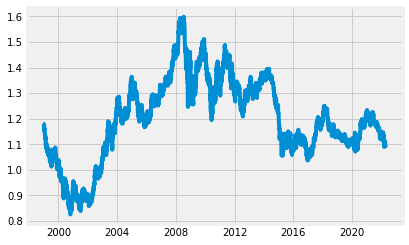

In [125]:
plt.plot(df_sect['Time'], df_sect['US_dollar'])
plt.show()

#### Compute Rolling Means

In [126]:
df_sect['rolling_30_mean'] = df_sect['US_dollar'].rolling(30).mean()
df_sect['rolling_365_mean'] = df_sect['US_dollar'].rolling(365).mean()

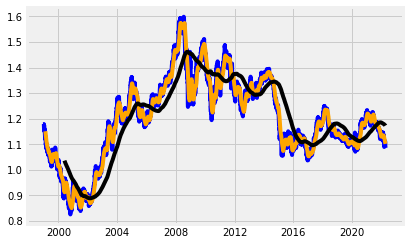

In [127]:
plt.plot(df_sect['Time'], df_sect['US_dollar'], color='blue')
plt.plot(df_sect['Time'], df_sect['rolling_30_mean'], color='orange')
plt.plot(df_sect['Time'], df_sect['rolling_365_mean'], color='black')
plt.show()

### Chart Idea

I will build a chart that shows the Euro-Dollar rate during the Coronavirus pandemic. I'll make six little charts, in a grid. One will be for 2016, 2017, 2018, 2019 and then 2020. The sixth chart will show all lines overlaid on each other; I'll calculate the average across all five prior years, and then plot COVID year on top. Rough idea in my head. Gray out and de-emphasize prior year lines, too.

In [128]:
plt.style.use('fivethirtyeight')

In [129]:
df_sect.head()

,Time,US_dollar,rolling_30_mean,rolling_365_mean
0,1999-01-04,1.1789,NaN,NaN
1,1999-01-05,1.1790,NaN,NaN
2,1999-01-06,1.1743,NaN,NaN
3,1999-01-07,1.1632,NaN,NaN
4,1999-01-08,1.1659,NaN,NaN


In [130]:
df_sect['year'] = df_sect['Time'].dt.year
df_sect['month'] = df_sect['Time'].dt.month
df_sect['day'] = df_sect['Time'].dt.dayofyear

In [131]:
df_sect.head()

,Time,US_dollar,rolling_30_mean,rolling_365_mean,year,month,day
0,1999-01-04,1.1789,NaN,NaN,1999,1,4
1,1999-01-05,1.1790,NaN,NaN,1999,1,5
2,1999-01-06,1.1743,NaN,NaN,1999,1,6
3,1999-01-07,1.1632,NaN,NaN,1999,1,7
4,1999-01-08,1.1659,NaN,NaN,1999,1,8


In [133]:
df_sect.tail(10)

,Time,US_dollar,rolling_30_mean,rolling_365_mean,year,month,day
6012,2022-03-28,1.0966,1.110557,1.174656,2022,3,87
6013,2022-03-29,1.1085,1.109690,1.174480,2022,3,88
6014,2022-03-30,1.1126,1.108870,1.174322,2022,3,89
6015,2022-03-31,1.1101,1.107973,1.174158,2022,3,90
6016,2022-04-01,1.1052,1.106967,1.173994,2022,4,91
6017,2022-04-04,1.1005,1.105857,1.173803,2022,4,94
6018,2022-04-05,1.0969,1.104613,1.173597,2022,4,95
6019,2022-04-06,1.0923,1.103210,1.173342,2022,4,96
6020,2022-04-07,1.0916,1.102387,1.173080,2022,4,97
6021,2022-04-08,1.0861,1.101203,1.172800,2022,4,98


In [146]:
df_sect_2017 = df_sect[df_sect['year'] == 2017]
df_sect_2018 = df_sect[df_sect['year'] == 2018]
df_sect_2019 = df_sect[df_sect['year'] == 2019]
df_sect_2020 = df_sect[df_sect['year'] == 2020]
df_sect_2021 = df_sect[df_sect['year'] == 2021]

In [150]:
pre_covid_df = pd.concat([df_sect_2017, df_sect_2018, df_sect_2019])
pre_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 4672 to 5436
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              765 non-null    datetime64[ns]
 1   US_dollar         765 non-null    float64       
 2   rolling_30_mean   765 non-null    float64       
 3   rolling_365_mean  765 non-null    float64       
 4   year              765 non-null    int64         
 5   month             765 non-null    int64         
 6   day               765 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 47.8 KB


In [152]:
pre_covid_df['day_mean'] = pre_covid_df.groupby(pre_covid_df['Time'].dt.day).transform('mean')

c:\Users\nsmcc\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\groupby\generic.py:1381: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  fast_path = lambda group: getattr(group, func)(*args, **kwargs)


ValueError: Wrong number of items passed 7, placement implies 1

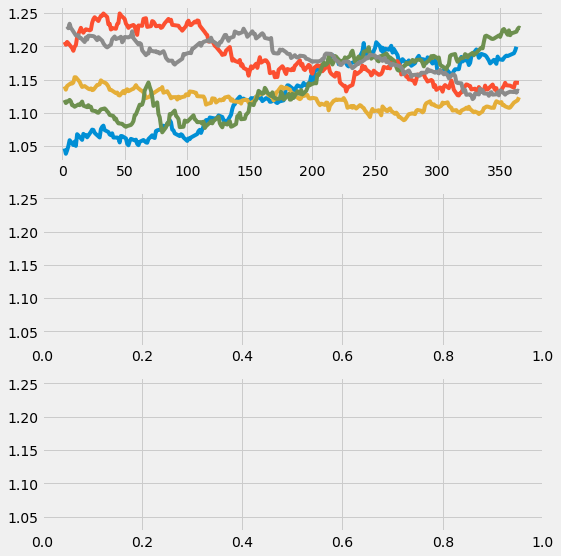

In [147]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(8, 9), ncols=1, nrows=3, sharey=True)
axes= [ax1, ax2, ax3]

ax1.plot(df_sect_2017['day'], df_sect_2017['US_dollar'])
ax1.plot(df_sect_2018['day'], df_sect_2018['US_dollar'])
ax1.plot(df_sect_2019['day'], df_sect_2019['US_dollar'])
ax1.plot(df_sect_2020['day'], df_sect_2020['US_dollar'])
ax1.plot(df_sect_2021['day'], df_sect_2021['US_dollar'])
plt.show()